# Laboratório de Python da disciplina EDB - UFMG


## Série de Fourier de uma função descontínua.


**Conteúdos:**

[1. Configurações iniciais.](#sec1) 

[2. Somas parciais de Fourier de f(x) = x.](#sec2)

[3. Análise da convergência.](#sec3)

[4. O fenômeno de Gibbs.](#sec4)

<div id="sec1"></div> 

## 1. Configurações iniciais.

In [1]:
#Importamos a biblioteca SymPy para fazer cálculos simbólicos (ou seja, sem avaliar as expressões).
import sympy as sp

#Importamos algumas funções do módulo display da biblioteca IPython para obter uma impressão mais agradável.
from IPython.display import display, Math

#Importamos a biblioteca NumPy.
import numpy as np

#Importamos o módulo pyplot da biblioteca Matplotlib para fazer gráficos.
import matplotlib.pyplot as plt

<div id="sec2"></div>

## 2. Somas parciais de Fourier de $f(x) = x$, $-L < x < L$, $2L$-periódica.

In [2]:
#Definição da função
def f(x):
    return x

### a) Cálculo dos coeficientes de Fourier

In [3]:
#coeficientes de Fourier de f
x = sp.Symbol('x')#x será considerado como símbolo
n = sp.Symbol('n', integer = True, positive=True)
Ls = sp.pi #Metade do período como constante SymPy

#coefte a0: expressão simbólica
a0 = (1/Ls)*sp.integrate(f(x),(x,-Ls,Ls))

#coeftes an: expressão simbólica
an = sp.trigsimp((1/Ls)*sp.integrate(f(x)*sp.cos(sp.pi*n*x/Ls),(x,-Ls,Ls)))

#coeftes bn: expressão simbólica
bn = sp.trigsimp((1/Ls)*sp.integrate(f(x)*sp.sin(sp.pi*n*x/Ls),(x,-Ls,Ls)))

#Mostrar os resultados
display(Math(f'a_0 = {sp.latex(a0)}'))
display(Math(f'a_n = {sp.latex(an)}'))
display(Math(f'b_n = {sp.latex(bn)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### b) Somas parciais de Fourier

In [4]:
#Valor de L como constante de NumPy
L = np.pi

#Primeiros 150 coeficientes an
a = [an.evalf(subs={n: j}) for j in range(1,150)]

#Primeiros 150 coeficientes bn
b = [bn.evalf(subs={n: j}) for j in range(1,150)]

#Função que calcula uma soma parcial de Fourier
def S_N(xv,N):
    #Soma parcial de Fourier da solução
    result = a0/2 + sum([a[j-1]*np.cos(j*np.pi*xv/L) for j in range(1,N+1)]) + \
    sum([b[j-1]*np.sin(j*np.pi*xv/L) for j in range(1,N+1)])
    #soma parcial que pode ser avaliada no Python 
    return result

### c) Gráfico de f junto com as somas parciais de Fourier no intervalo $[-3L,3L]$.

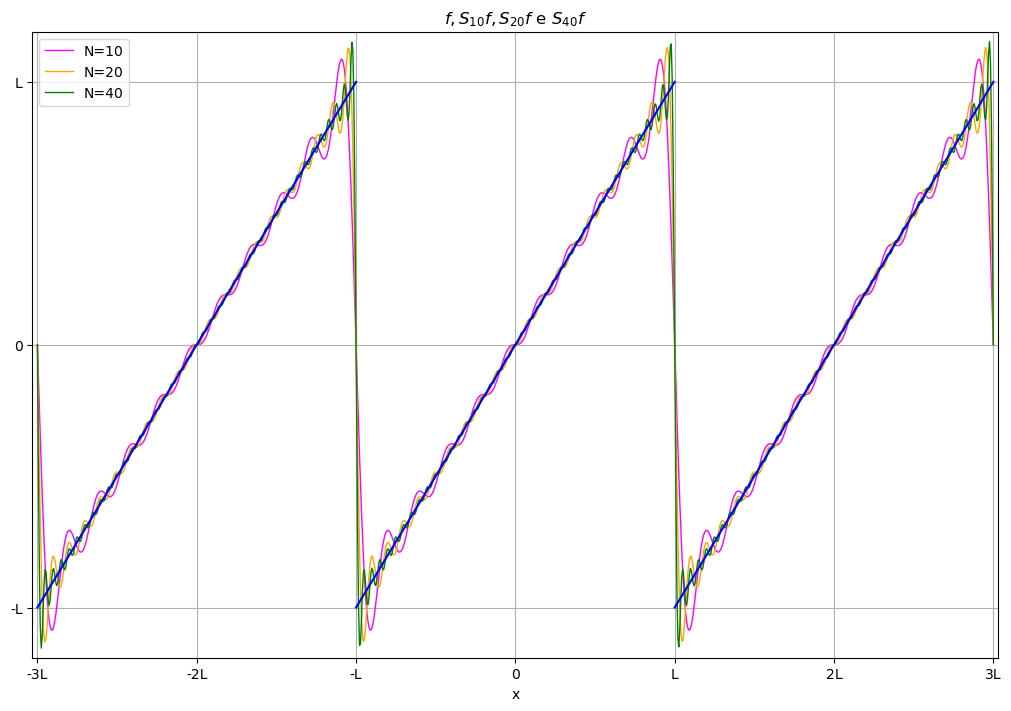

In [5]:
M = 100 # Relativo à quantidade de pontos numa malha para plotar

# Tamanho da figura e janelas
figsize = (10, 7)
colunas = 1
linhas = 1
fig, ax = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True)

#Configurações do gráfico
ax.set_title(r'$f, S_{10} f, S_{20} f$ e $S_{40} f$')
ax.set_xlabel('x')
ax.set_xlim((-3*L-0.1,3*L+0.1))
ax.set_ylim((-L-0.6,L+0.6))
ax.set_xticks([-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi], 
       ['-3L', '-2L', '-L', '0' , 'L', '2L', '3L'])
ax.set_yticks([-np.pi, 0, np.pi], ['-L', '0', 'L'])

#Plotar somas parciais de Fourier
malha_x = np.linspace(-3*L, 3*L, num=10*M + 1)
ax.plot(malha_x, S_N(malha_x,10),'-',color = 'magenta',linewidth=1, label = 'N=10')
ax.plot(malha_x, S_N(malha_x,20),'-',color = 'orange',linewidth=1, label = 'N=20')
ax.plot(malha_x, S_N(malha_x,40),'-',color = 'green',linewidth=1, label = 'N=40')

#Função $f$
malha_x = np.linspace(-L, L, num=2*M + 1)
ax.plot(malha_x-2*L, f(malha_x),'-',color = 'blue', linewidth = 1.5)
ax.plot(malha_x, f(malha_x),'-',color = 'blue', linewidth = 1.5)
ax.plot(malha_x+2*L, f(malha_x),'-',color = 'blue', linewidth = 1.5)
ax.grid(True)
ax.legend();

<div id="sec3"></div>

## 3. Análise da convergência.

Nos gráficos acima, percebe-se que longe dos extremos de intervalos onde $f$ é descontínua, a sequência de somas parciais parece estar convergindo. 

Isso ficará mais claro plotando os gráficos apenas no intervalo $\big[-\frac{3L}{4}, \frac{3L}{4}\big]$, junto com as retas $y = x + \varepsilon$ e $y = x - \varepsilon$ para $\varepsilon = 0.1$. 

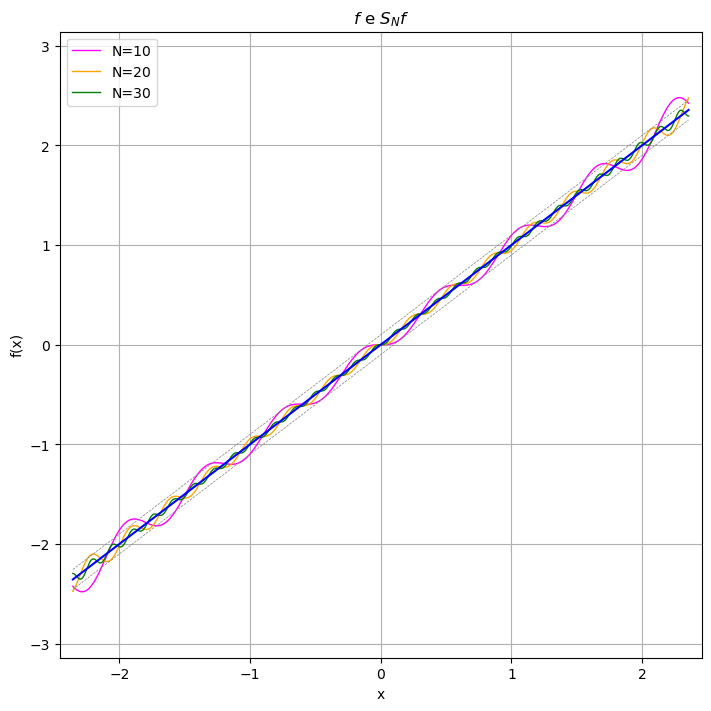

In [6]:
M = 100 # Quantidade de pontos numa malha para plotar

# Tamanho da figura e janelas
figsize = (7, 7)
colunas = 1
linhas = 1
fig, ax = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True)
#fig.suptitle(r'Gráficos de $f$ e $S_N f$')

#Função $f$ junto com as somas parciais de Fourier
ax.set_title(r'$f$ e $S_N f$')
ax.set_ylabel('f(x)')
ax.set_xlabel('x')
ax.set_xlim((-3*L/4-0.1,3*L/4+0.1))
ax.set_ylim((-L,L))

#Plotar somas parciais de Fourier
malha_x = np.linspace(-3*L/4, 3*L/4, num=10*M + 1)
ax.plot(malha_x, S_N(malha_x,10),'-',color = 'magenta',linewidth=1, label = 'N=10')
ax.plot(malha_x, S_N(malha_x,20),'-',color = 'orange',linewidth=1, label = 'N=20')
ax.plot(malha_x, S_N(malha_x,40),'-',color = 'green',linewidth=1, label = 'N=30')

#Função $f$
malha_x = np.linspace(-3*L/4, 3*L/4, num=M + 1)
ax.plot(malha_x, f(malha_x),'-',color = 'blue')

#Retas x+epsilon e x-epsilon
epsilon = 0.1
ax.plot(malha_x, f(malha_x)+epsilon,'--', linewidth = 0.5, color = 'gray')
ax.plot(malha_x,f(malha_x)-epsilon,'--', linewidth = 0.5, color = 'gray')

ax.grid(True)
ax.legend();

**Dica**: Você pode analisar melhor a convergência aumentando o valor de $N$, diminuindo o valor de $\varepsilon$. Você também pode investigar o que acontece ao reduzirmos o comprimento do intervalo.

<div id="sec4"></div>

## 4. O fenômeno de Gibbs.

Até aqui verificamos que em todo ponto onde $f$ é contínua, $S_Nf(x_0)$ se aproxima de $f(x_0)$ a medida que $N$ cresce. Que acontece nos pontos onde $f$ é descontínua?

Observe que perto de $x = L$, à esquerda, as somas parciais $S_Nf$ atingem um valor máximo tal que o excesso em relação ao valor com $f$ não diminui com o aumento de $N$. Algo similar acontece perto de $x = -L$, à direita. Este é um fenômeno geral presente quando há descontinuidades na função. Ele é chamado de [*fenômeno de Gibbs*](https://pt.wikipedia.org/wiki/Fen%C3%B4meno_de_Gibbs) e recebeu seu nome em homenagem ao físico estadunidense Josiah Gibbs.

Este fenômeno é ilustrado na figura a seguir.

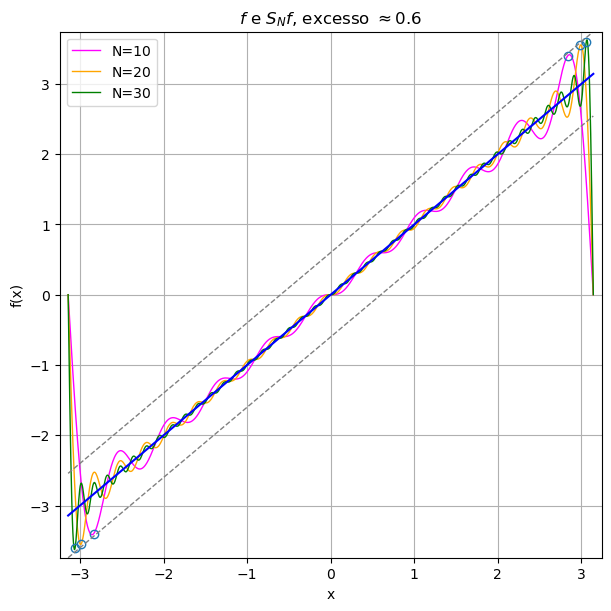

In [7]:
M = 100 # Quantidade de pontos numa malha para plotar

# Tamanho da figura e janelas
figsize = (6, 6)
colunas = 1
linhas = 1
fig, ax = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True)
#fig.suptitle(r'Gráficos de $f$ e $S_N f$')

#Função $f$ junto com as somas parciais de Fourier
ax.set_title(r'$f$ e $S_N f$, excesso $\approx 0.6$')
ax.set_ylabel('f(x)')
ax.set_xlabel('x')
ax.set_xlim((-L-0.1,L+0.1))
ax.set_ylim((-L-0.6,L+0.6))

#Plotar somas parciais de Fourier
malha_x = np.linspace(-L, L, num=10*M + 1)
ax.plot(malha_x, S_N(malha_x,10),'-',color = 'magenta',linewidth=1, label = 'N=10')
ax.plot(malha_x, S_N(malha_x,20),'-',color = 'orange',linewidth=1, label = 'N=20')
ax.plot(malha_x, S_N(malha_x,40),'-',color = 'green',linewidth=1, label = 'N=30')

#Pontos de máximo de S_N
ax.plot([L-L/10 + 0.01, L-L/20, L-L/30 + 0.02], 
        [S_N(L-L/10 + 0.01,10), S_N(L-L/20,20), S_N(L-L/30,30)], 'o', ms = 6, mec = 'tab:blue', mfc = 'none')

#Pontos de mínimo de S_N
ax.plot([-L+L/10 - 0.01, -L+L/20, -L+L/30 - 0.02], 
        [S_N(-L+L/10 - 0.01,10), S_N(-L+L/20,20), S_N(-L+L/30,30)], 'o', ms = 6, mec = 'tab:blue', mfc = 'none')

#Função $f$
malha_x = np.linspace(-L, L, num=M + 1)
ax.plot(malha_x, f(malha_x),'-',color = 'blue')

#Retas x+epsilon e x-epsilon
#epsilon é o excesso por cima ou por baixo de f
epsilon = 0.6
ax.plot(malha_x, f(malha_x)+epsilon,'--', linewidth = 1, color = 'gray')
ax.plot(malha_x,f(malha_x)-epsilon,'--', linewidth = 1, color = 'gray')

ax.grid(True)
ax.legend();